In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [57]:
columns=pd.read_csv('D:\My-Projects\kidney disease dataset\data_description.txt',sep='-')
columns=columns.reset_index();

In [58]:
columns.columns=['short','full_name']
columns.head()

,short,full_name
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin


In [59]:
df.columns=columns['full_name']

In [60]:
df.head()

full_name,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [61]:
df.dtypes

full_name
id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [62]:
def convert_dtypes(df,feature):
    df[feature]=pd.to_numeric(df[feature],errors='coerce')


In [63]:
features=['packed cell volume','white blood cell count','red blood cell count']

for feature in features:
    convert_dtypes(df,feature)

In [64]:
df.dtypes

full_name
id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume         float64
white blood cell count     float64
red blood cell count       float64
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [65]:
df.drop('id',axis=1,inplace=True)

In [66]:
df.describe()

full_name,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [67]:
cat_col=[i for i in df.columns if df[i].dtype=='object']

num_col=[i for i in df.columns if df[i].dtype!='object']

In [68]:
for col in cat_col:
    print(col,df[col].unique())

red blood cells [nan 'normal' 'abnormal']
 pus cell ['normal' 'abnormal' nan]
pus cell clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
ypertension ['yes' 'no' nan]
diabetes mellitus ['yes' 'no' ' yes' '\tno' '\tyes' nan]
coronary artery disease ['no' 'yes' '\tno' nan]
appetite ['good' 'poor' nan]
pedal edema ['no' 'yes' nan]
anemia ['no' 'yes' nan]
class ['ckd' 'ckd\t' 'notckd']


In [69]:
df['coronary artery disease'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)
df['diabetes mellitus'].replace(to_replace={'\tno':'no','\tyes':'yes'},inplace=True)

In [70]:
df['class'].replace(to_replace='ckd\t',value='ckd',inplace=True)

In [71]:
for col in cat_col:
    print(col,df[col].unique())

red blood cells [nan 'normal' 'abnormal']
 pus cell ['normal' 'abnormal' nan]
pus cell clumps ['notpresent' 'present' nan]
bacteria ['notpresent' 'present' nan]
ypertension ['yes' 'no' nan]
diabetes mellitus ['yes' 'no' ' yes' nan]
coronary artery disease ['no' 'yes' nan]
appetite ['good' 'poor' nan]
pedal edema ['no' 'yes' nan]
anemia ['no' 'yes' nan]
class ['ckd' 'notckd']


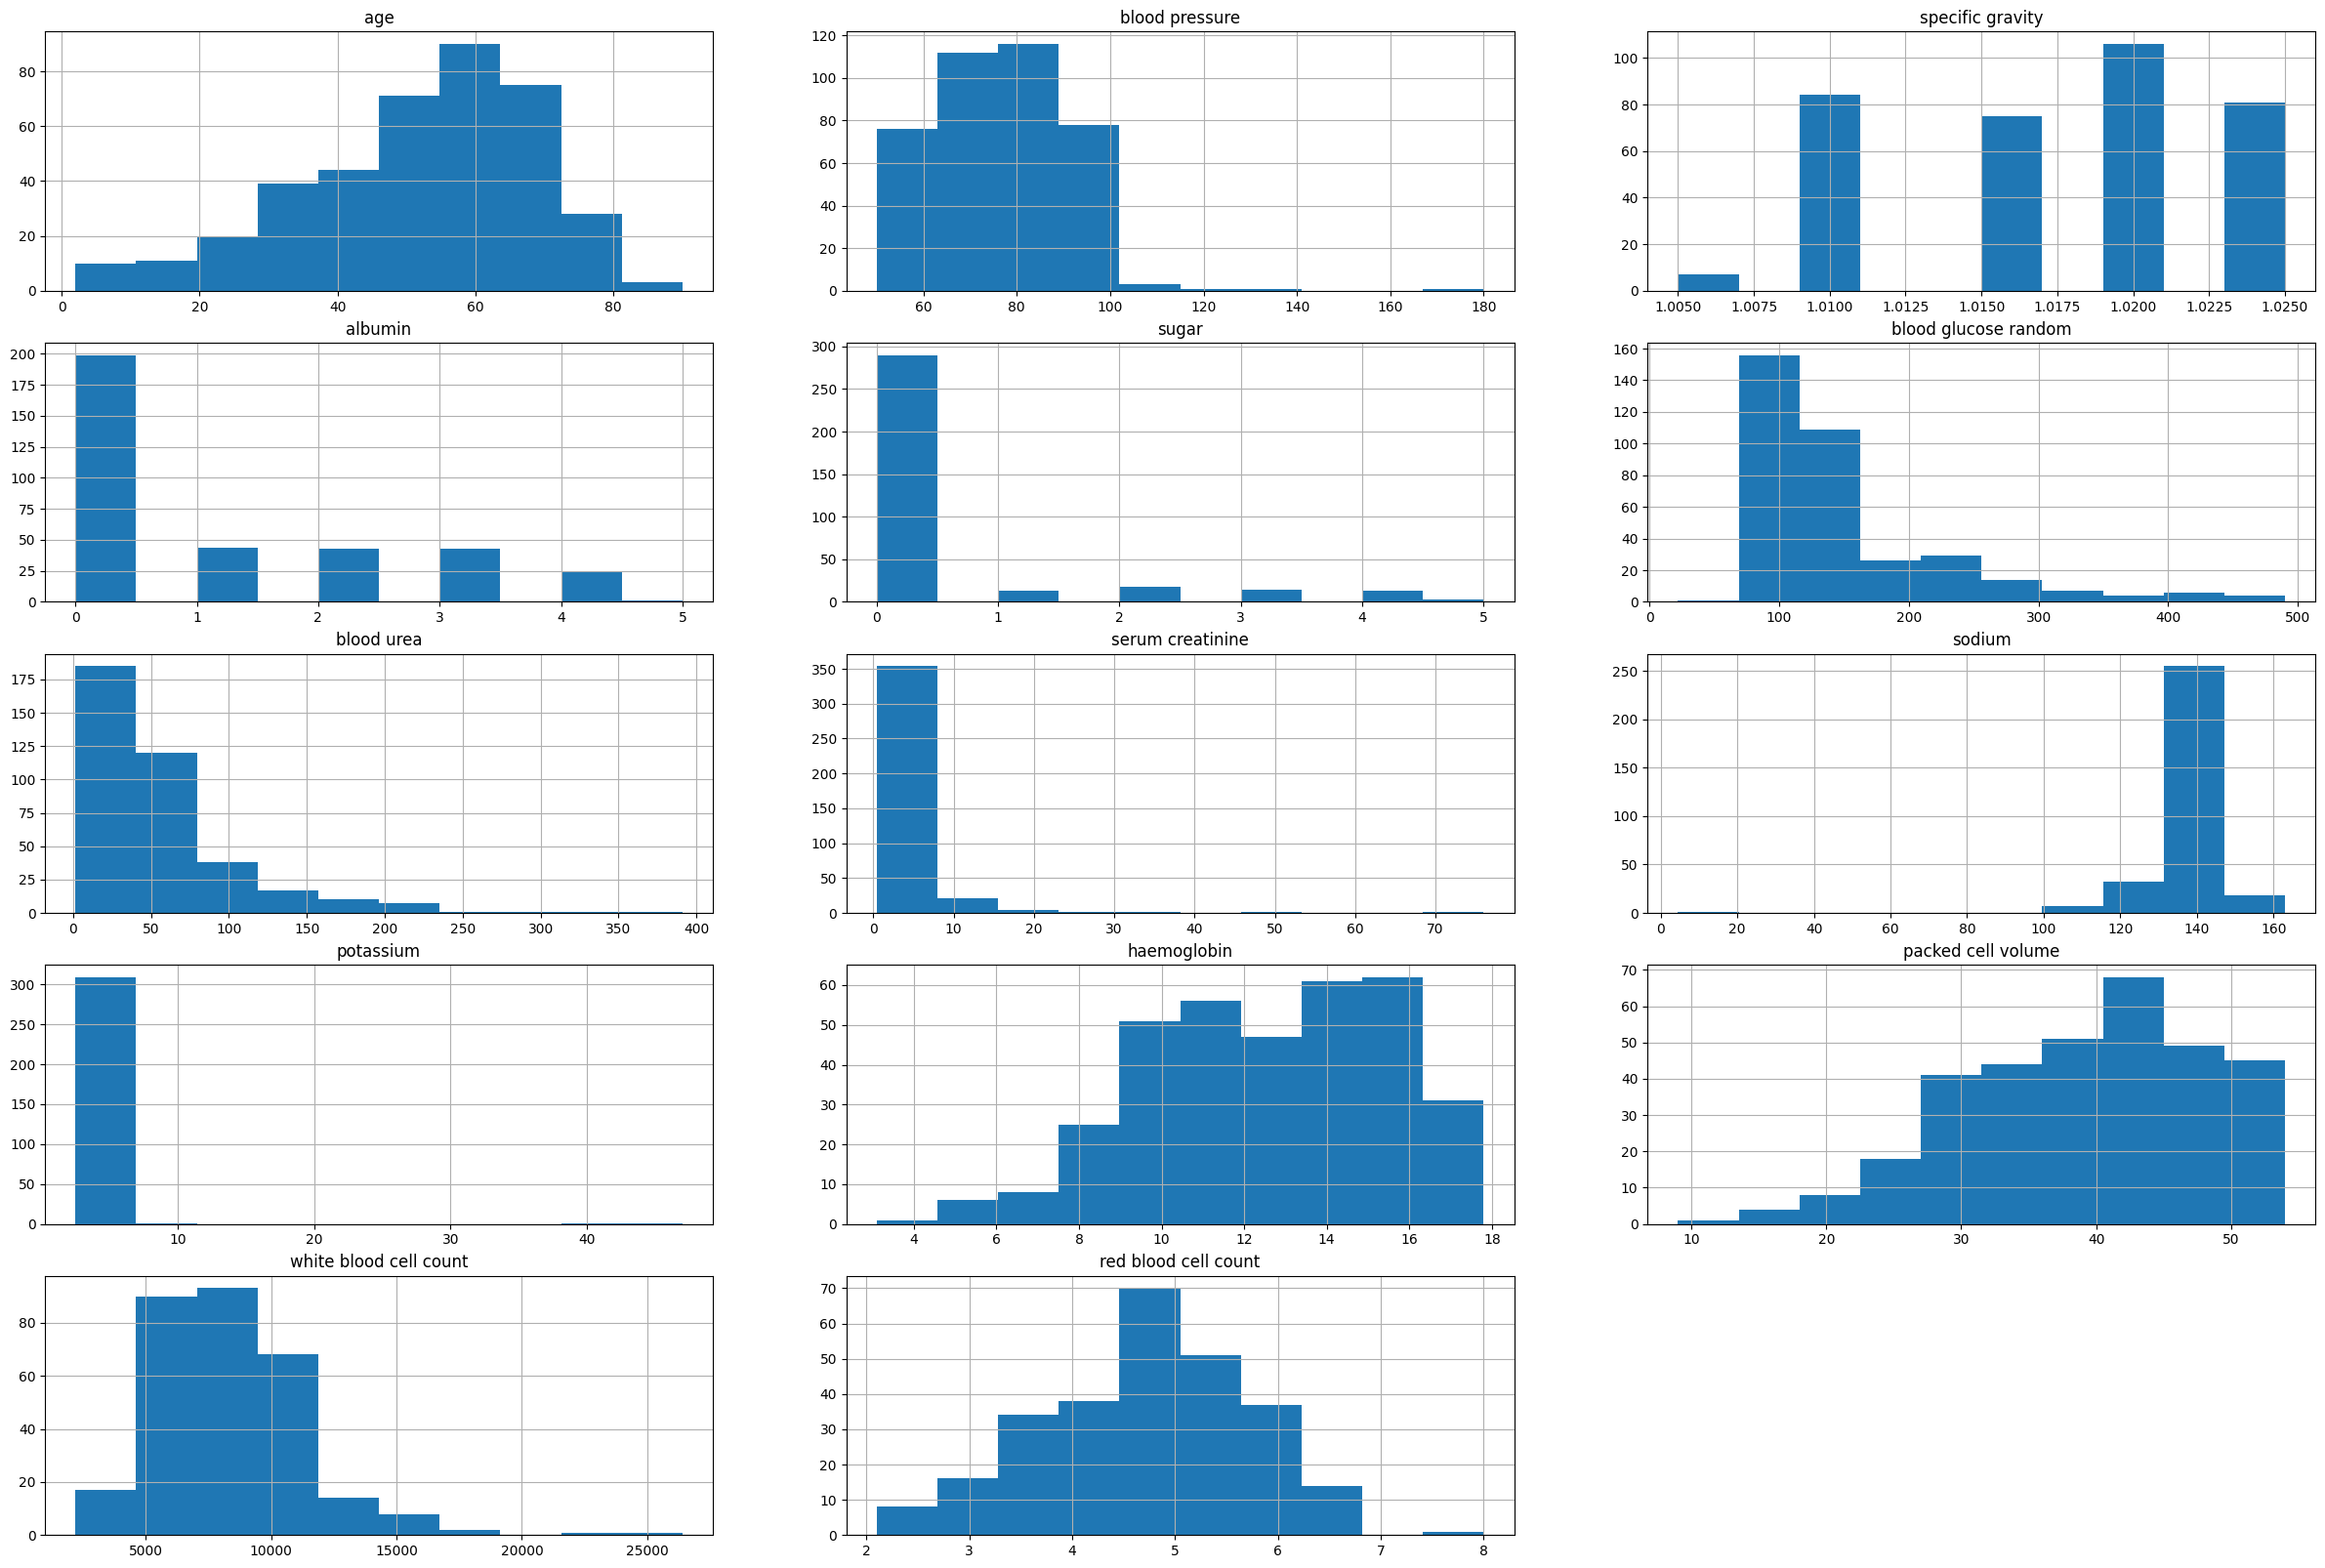

In [72]:
plt.figure(figsize=(30,20))
for i,col in enumerate(num_col):
        plt.subplot(5,3,i+1)
        df[col].hist()
        plt.title(col)

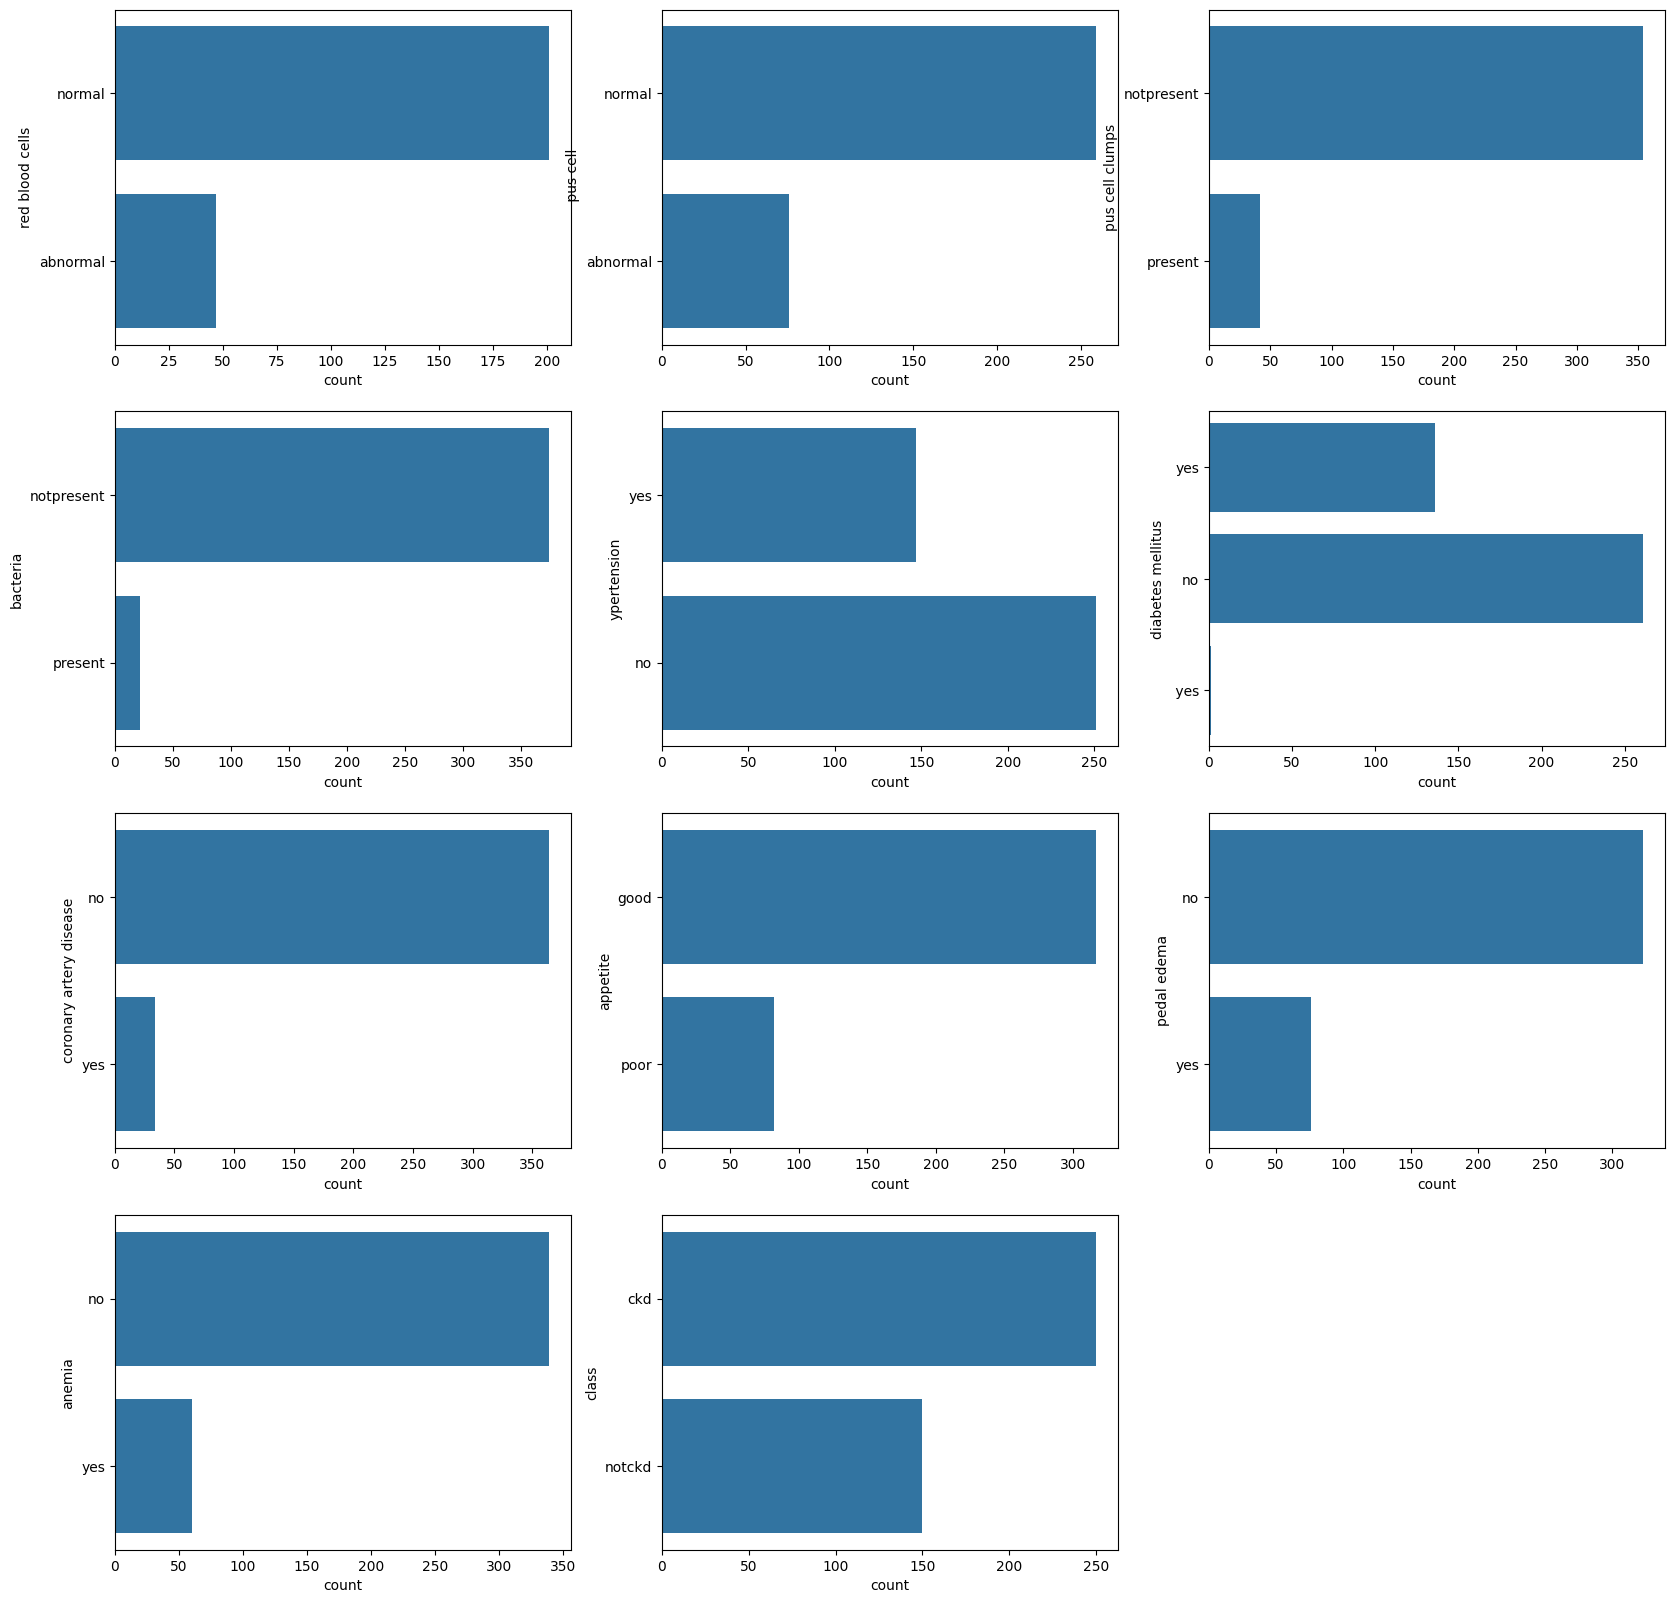

In [73]:
plt.figure(figsize=(20,20))

for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

<Axes: xlabel='count', ylabel='class'>

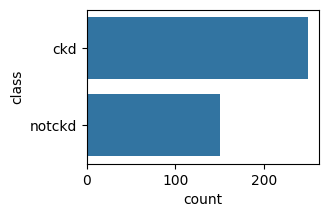

In [74]:
plt.figure(figsize=(3,2))
sns.countplot(df['class'])

In [75]:
df[num_col].corr()

full_name,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
full_name,,,,,,,,,,,,,,
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873


<Axes: xlabel='full_name', ylabel='full_name'>

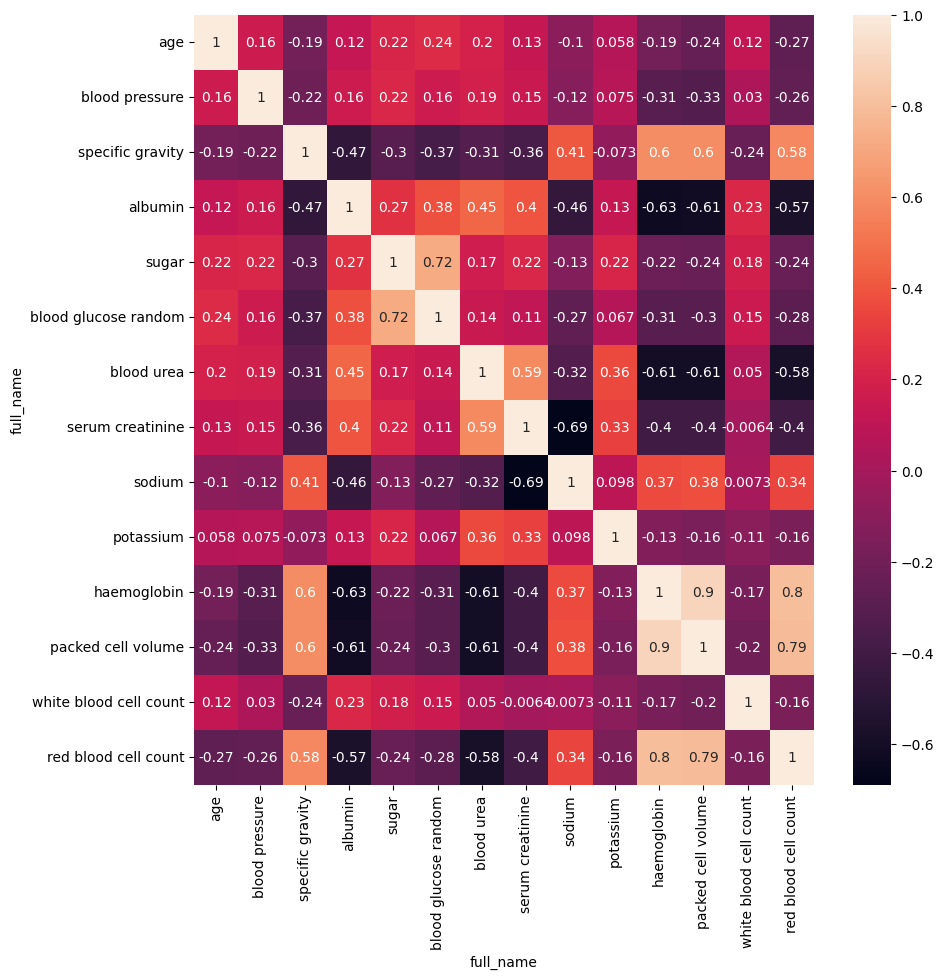

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(df[num_col].corr(),annot=True)

In [77]:
df.groupby(['class','red blood cells'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
class  red blood cells                                   
ckd    abnormal            25  3.832000     3.7  2.5  5.6
       normal              40  3.782500     3.8  2.1  8.0
notckd normal             134  5.368657     5.3  4.4  6.5

In [78]:
import plotly.express as px

In [79]:
px.violin(df,y='red blood cell count',x='class',color='class')

In [80]:
class_labels=df['class'].replace(to_replace={'ckd':1,'notckd':0})

Text(0, 0.5, 'packed cell volume')

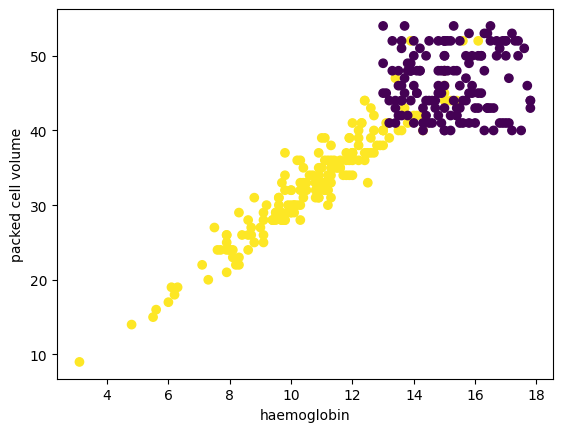

In [81]:
plt.scatter(df['haemoglobin'],df['packed cell volume'],c=[class_labels])
plt.xlabel('haemoglobin')
plt.ylabel('packed cell volume')

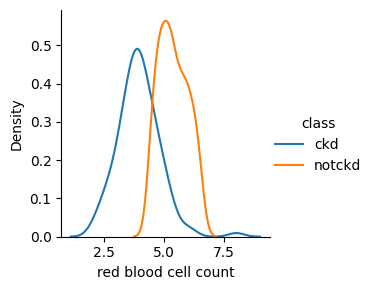

In [82]:
grid=sns.FacetGrid(df,hue='class')
grid.map(sns.kdeplot,'red blood cell count')
grid.add_legend()

In [83]:
def violin(col):
    fig=px.violin(df,y=col,x='class',color='class',box=True)
    return fig.show()

def scatter(col1,col2):
    plt.scatter(df[col1],df[col2],c=class_labels)
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.legend()
    

def kde_plot(feature):
    grid=sns.FacetGrid(df,hue='class')
    grid.map(sns.kdeplot,feature)
    grid.add_legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


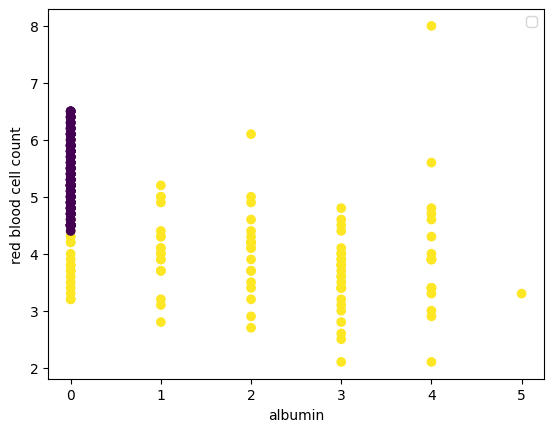

In [84]:
scatter('albumin','red blood cell count')

In [85]:
df.isnull().sum().sort_values(ascending=False)

full_name
red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

<Axes: xlabel='count', ylabel='red blood cells'>

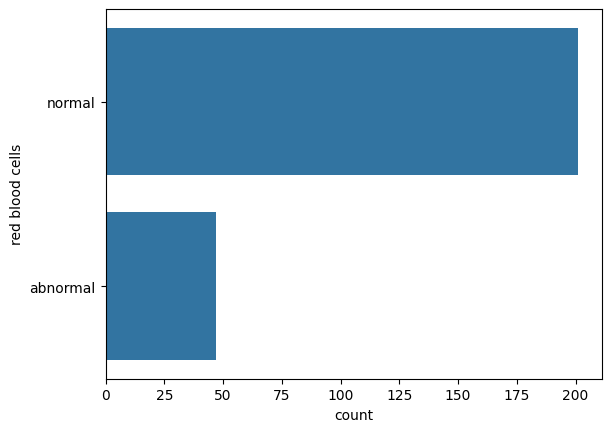

In [86]:
sns.countplot(df['red blood cells'])

In [87]:
sample=df['red blood cells'].dropna().sample(152)

In [88]:
df[df['red blood cells'].isnull()].index

Index([  0,   1,   5,   6,  10,  12,  13,  15,  16,  17,
       ...
       245, 268, 280, 290, 295, 309, 322, 349, 350, 381],
      dtype='int64', length=152)

In [89]:
sample.index=df[df['red blood cells'].isnull()].index

In [90]:
df.loc[sample.index,'red blood cells']=sample


<Axes: xlabel='count', ylabel='red blood cells'>

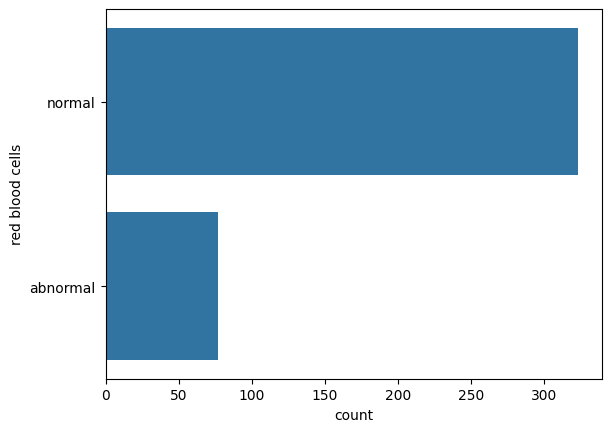

In [91]:
sns.countplot(df['red blood cells'])

In [92]:
def handle_missing_value(feature):
    sample=df[feature].dropna().sample(df[feature].isnull().sum())
    sample.index=df[df[feature].isnull()].index
    df.loc[sample.index,feature]=sample
    

In [93]:
df[num_col].isnull().sum() 

full_name
age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [94]:
for col in num_col:
    handle_missing_value(col)

In [95]:
df[num_col].isnull().sum() 

full_name
age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [96]:
df[cat_col].isnull().sum()

full_name
red blood cells             0
 pus cell                  65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

In [97]:
for col in cat_col:
    handle_missing_value(col)

In [98]:
df[cat_col].isnull().sum()

full_name
red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [99]:
for col in cat_col:
    print("{} has categories {}".format(col,df[col].unique()))

red blood cells has categories ['normal' 'abnormal']
 pus cell has categories ['normal' 'abnormal']
pus cell clumps has categories ['notpresent' 'present']
bacteria has categories ['notpresent' 'present']
ypertension has categories ['yes' 'no']
diabetes mellitus has categories ['yes' 'no' ' yes']
coronary artery disease has categories ['no' 'yes']
appetite has categories ['good' 'poor']
pedal edema has categories ['no' 'yes']
anemia has categories ['no' 'yes']
class has categories ['ckd' 'notckd']


In [100]:
df['diabetes mellitus'].replace(to_replace=' yes',value='yes',inplace=True)

In [105]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

'Encode target labels with value between 0 and n_classes-1.\n\n    This transformer should be used to encode target values, *i.e.* `y`, and\n    not the input `X`.\n\n    Read more in the :ref:`User Guide <preprocessing_targets>`.\n\n    .. versionadded:: 0.12\n\n    Attributes\n    ----------\n    classes_ : ndarray of shape (n_classes,)\n        Holds the label for each class.\n\n    See Also\n    --------\n    OrdinalEncoder : Encode categorical features using an ordinal encoding\n        scheme.\n    OneHotEncoder : Encode categorical features as a one-hot numeric array.\n\n    Examples\n    --------\n    `LabelEncoder` can be used to normalize labels.\n\n    >>> from sklearn.preprocessing import LabelEncoder\n    >>> le = LabelEncoder()\n    >>> le.fit([1, 2, 2, 6])\n    LabelEncoder()\n    >>> le.classes_\n    array([1, 2, 6])\n    >>> le.transform([1, 1, 2, 6])\n    array([0, 0, 1, 2]...)\n    >>> le.inverse_transform([0, 0, 1, 2])\n    array([1, 1, 2, 6])\n\n    It can also be 

In [102]:
for col in cat_col:
    df[col]=le.fit_transform(df[col])

In [104]:
for col in cat_col:
    print("{} has categories {}".format(col,df[col].unique()))

red blood cells has categories [1 0]
 pus cell has categories [1 0]
pus cell clumps has categories [0 1]
bacteria has categories [0 1]
ypertension has categories [1 0]
diabetes mellitus has categories [1 0]
coronary artery disease has categories [0 1]
appetite has categories [0 1]
pedal edema has categories [0 1]
anemia has categories [0 1]
class has categories [0 1]


In [110]:
df.head()

full_name,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,120.0,...,38.0,6000.0,4.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.3,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [117]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [116]:
ind_col=df.columns[:-1]
dep_col='class'

In [118]:
X=df[ind_col]
y=df[dep_col]

In [156]:
KBestFeature=SelectKBest(score_func=chi2,k=20)
bestFeature=KBestFeature.fit(X,y)

In [157]:
bestFeature


SelectKBest(k=20, score_func=<function chi2 at 0x0000026FC4AFC860>)

In [158]:
dataScores=pd.DataFrame(bestFeature.scores_,columns=['score'])
dataScores


,score
0,108.329977
1,85.887550
2,0.004856
3,220.517492
4,86.167970
5,10.263983
6,11.625478
7,25.200000
8,13.200000
9,2107.970216


In [159]:
dfcols=pd.DataFrame(X.columns)
dfcols

,full_name
0,age
1,blood pressure
2,specific gravity
3,albumin
4,sugar
5,red blood cells
6,pus cell
7,pus cell clumps
8,bacteria
9,blood glucose random


In [167]:
features_rank=pd.concat([dfcols,dataScores],axis=1)
features_rank.columns=['features','scores']

In [169]:
features_rank.nlargest(10,'scores')

,features,scores
16,white blood cell count,12356.728524
10,blood urea,2362.090573
9,blood glucose random,2107.970216
15,packed cell volume,326.556436
11,serum creatinine,302.546726
3,albumin,220.517492
14,haemoglobin,127.506535
0,age,108.329977
18,ypertension,88.200000
4,sugar,86.167970


In [174]:
best_columns=features_rank.nlargest(10,'scores')['features'].values

In [176]:
X_new=df[best_columns]

In [178]:
X_new.shape

(400, 10)

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.25, random_state=0)

In [182]:
print(X_train.shape)
print(X_test.shape)

(300, 10)
(100, 10)
